# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [6]:
from PIL import Image
import cv2
import pickle

# Loading Data

In [11]:
trainParentDirectory = '/Users/kartheepan/projects/facial expression recognition/train/'
testParentDirectory = '/Users/kartheepan/projects/facial expression recognition/test/'

train, test = pd.DataFrame(), pd.DataFrame()
imagePath, expression = [], []

for folder in os.listdir(trainParentDirectory):
    try:
        for filename in os.listdir(trainParentDirectory+folder):
            imagePath.append(os.path.join(trainParentDirectory, folder, filename))
            expression.append(folder)
    except:
        pass

train['imagePath'], train['expression'] = imagePath, expression
imagePath, expression = [], []

for folder in os.listdir(testParentDirectory):
    try:
        for filename in os.listdir(testParentDirectory+folder):
            imagePath.append(os.path.join(testParentDirectory, folder, filename))
            expression.append(folder)
    except:
        pass

test['imagePath'], test['expression'] = imagePath, expression

# EDA

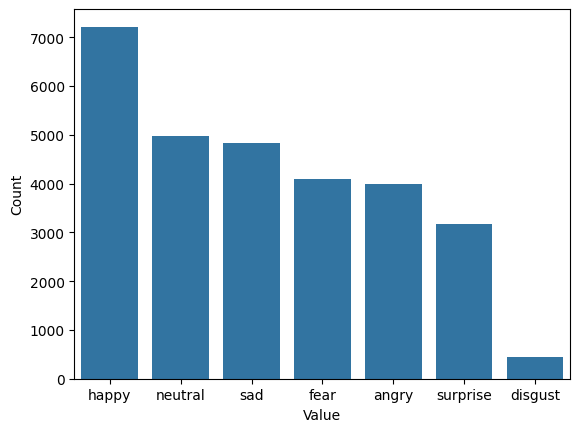

In [5]:
vc = train['expression'].value_counts().reset_index()
vc.columns = ['Value', 'Count']
sns.barplot(x = 'Value', y = 'Count', data = vc)
plt.show()

/Users/kartheepan/projects/facial expression recognition/train/happy/Training_50449107.jpg happy


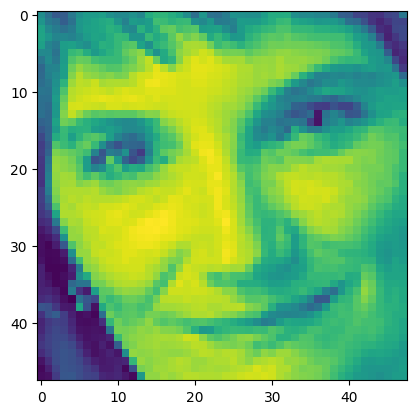

In [6]:
img = Image.open(train['imagePath'][0])
plt.imshow(img)
print(train['imagePath'][0], train['expression'][0])

# Feature Extraction

In [13]:
def featureExtraction(images):
    features = []
    for image in images:
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [14]:
trainFeatures = featureExtraction(train['imagePath'])
testFeatures = featureExtraction(test['imagePath'])

In [15]:
xTrain = trainFeatures/255
xTest = testFeatures/255

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['expression'])
yTrain = le.transform(train['expression'])
yTest = le.transform(test['expression'])

In [11]:
train['expression']

0          happy
1          happy
2          happy
3          happy
4          happy
          ...   
28704    disgust
28705    disgust
28706    disgust
28707    disgust
28708    disgust
Name: expression, Length: 28709, dtype: object

In [12]:
yTrain = to_categorical(yTrain, num_classes = 7)
yTest = to_categorical(yTest, num_classes = 7)

# Model Creation

In [13]:
input_shape = (48, 48, 1)
output_class = 7

In [14]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(output_class, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-11-06 09:03:31.306399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-06 09:03:31.306437: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
history = model.fit(x = xTrain, y = yTrain, batch_size = 128, epochs = 100, validation_data = (xTest, yTest))

Epoch 1/100


2023-11-06 09:03:35.849716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<128x23x23x128xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<128x10x10x25

224/225 [============================>.] - ETA: 0s - loss: 1.8229 - accuracy: 0.2451

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<37x23x23x128xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<37x10x10x256xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerfo

225/225 [==============================] - ETA: 0s - loss: 1.8230 - accuracy: 0.2451

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<37x23x23x128xi1>'
2023-11-06 09:04:04.244451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


225/225 [==============================] - 31s 132ms/step - loss: 1.8230 - accuracy: 0.2451 - val_loss: 1.8153 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 29s 129ms/step - loss: 1.8058 - accuracy: 0.2529 - val_loss: 1.7900 - val_accuracy: 0.2499
Epoch 3/100
225/225 [==============================] - 29s 129ms/step - loss: 1.7613 - accuracy: 0.2693 - val_loss: 1.6842 - val_accuracy: 0.3089
Epoch 4/100
225/225 [==============================] - 29s 129ms/step - loss: 1.6695 - accuracy: 0.3260 - val_loss: 1.5654 - val_accuracy: 0.3774
Epoch 5/100
225/225 [==============================] - 29s 128ms/step - loss: 1.5575 - accuracy: 0.3872 - val_loss: 1.4445 - val_accuracy: 0.4330
Epoch 6/100
225/225 [==============================] - 29s 127ms/step - loss: 1.4724 - accuracy: 0.4260 - val_loss: 1.3689 - val_accuracy: 0.4731
Epoch 7/100
225/225 [==============================] - 28s 126ms/step - loss: 1.4190 - accuracy: 0.4508 - val_loss: 1.3250 - val_accurac

In [39]:
with open('facialExpressionRecognision.pkl', 'wb') as model_file:
    pickle.dump(model.to_json(), model_file)

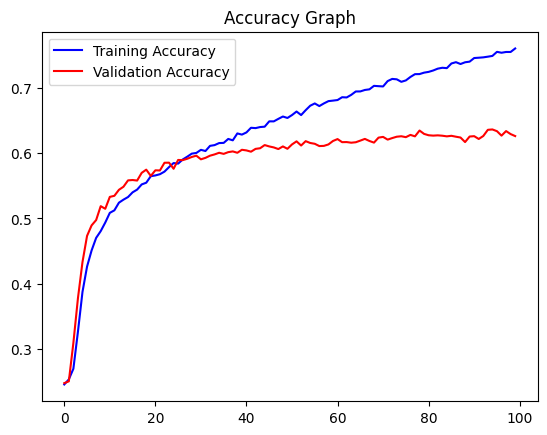

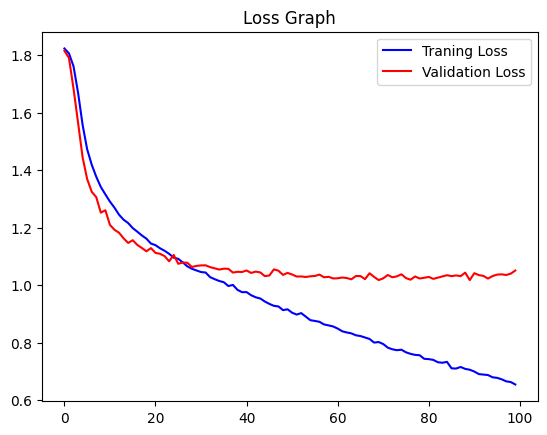

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label = 'Traning Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

In [18]:
import random

Original Output: fear
1/1 [==============================] - 0s 275ms/step
Predicted Output: sad


2023-11-06 09:59:00.147160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


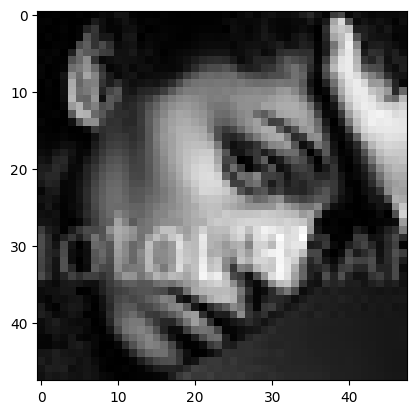

In [19]:
image_index = random.randint(0, len(test))
print("Original Output:", test['expression'][image_index])
pred = model.predict(xTest[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(xTest[image_index].reshape(48, 48), cmap='gray')

Original Output: fear
1/1 [==============================] - 0s 14ms/step
Predicted Output: fear


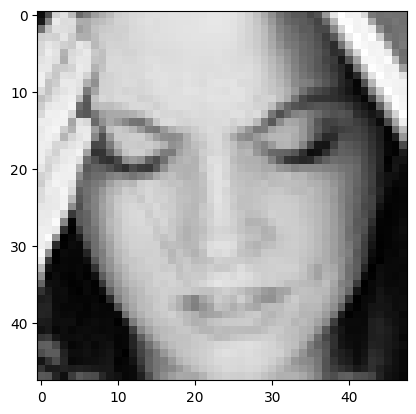

In [56]:
image_index = random.randint(0, len(test))
print("Original Output:", test['expression'][image_index])
pred = model.predict(xTest[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(xTest[image_index].reshape(48, 48), cmap='gray')

Original Output: happy
1/1 [==============================] - 0s 17ms/step
Predicted Output: happy


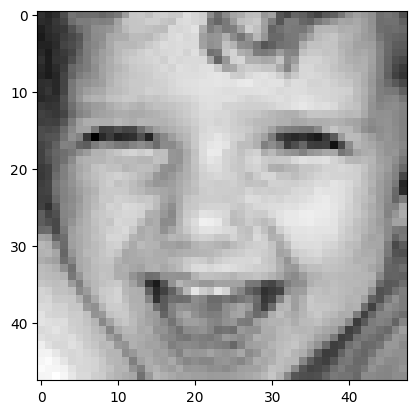

In [20]:
image_index = random.randint(0, len(test))
print("Original Output:", test['expression'][image_index])
pred = model.predict(xTest[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(xTest[image_index].reshape(48, 48), cmap='gray')

2940
Original Output: sad
1/1 [==============================] - 0s 28ms/step
Predicted Output: sad


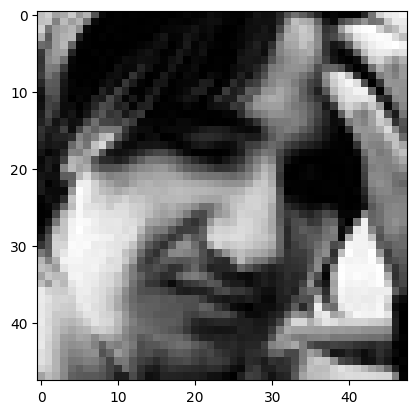

In [21]:
image_index = random.randint(0, len(test))
print(image_index)
print("Original Output:", test['expression'][image_index])
pred = model.predict(xTest[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(xTest[image_index].reshape(48, 48), cmap='gray')

In [2]:
def featureExtractionSingle(image):
    features = []
    img = load_img(image, grayscale=True)
    img = np.array(img)
    img = cv2.resize(img, (48, 48))
    features.append(img)
    features = np.array(features)
    return features, img

1/1 [==============================] - 0s 51ms/step
Predicted Output: happy


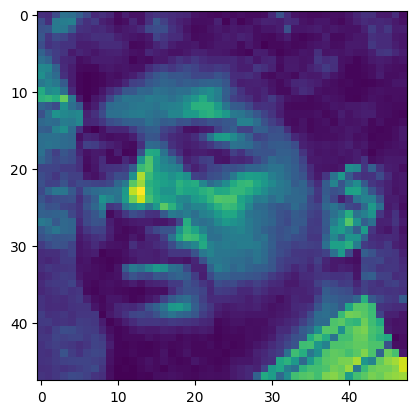

In [47]:
newImgFeatures, newImg = featureExtractionSingle('testImage.png')
pred = model.predict(newImgFeatures.reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(newImg)

In [116]:
model.save('facialExpressionRecognisionTF.h5')

In [7]:
loadedModelTF = tf.keras.models.load_model('facialExpressionRecognisionTF.h5')

2023-11-08 18:58:13.672073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-08 18:58:13.672287: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



1/1 [==============================] - 0s 29ms/step
Predicted Output: angry


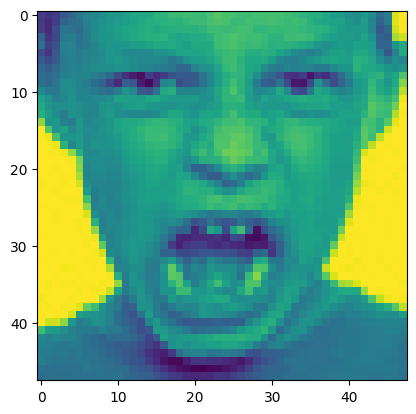

In [19]:
newImgFeatures, newImg = featureExtractionSingle('/Users/kartheepan/projects/facial expression recognition/train/angry/Training_99770811.jpg')
pred = loadedModelTF.predict(newImgFeatures.reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(newImg)